# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np
from textblob import TextBlob
from imblearn.over_sampling import SMOTE

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

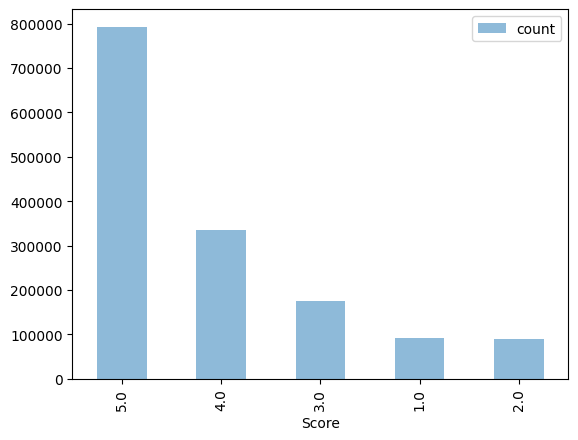


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:
trainingSet = pd.read_csv("/kaggle/input/cs-506-midterm-fall/train.csv")
testingSet = pd.read_csv("/kaggle/input/cs-506-midterm-fall/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Adding Features

In [3]:
def add_features_to(df):
    print("Starting feature extraction...")

    # calculate helpfulness 
    print("started calculating helpfulness")
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)  #handle NANs

    # calculateReviewLengthWords
    print("calculating ReviewLengthWords")
    df['ReviewLengthWords'] = df['Text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    # function to calculate sentiment 
    def get_sentiment(text, index):
        # ensure text is a string, if not,sentiment = 0 for non-strings
        if isinstance(text, str):  
            blob = TextBlob(text)
            # get sentiment polarity 
            sentiment = blob.sentiment.polarity  
        else:
            sentiment = 0 
        # print progress every 200000 rows
        if index % 200000 == 0:  
            print(index, "rows processed for sentiment thus far")
        return sentiment

    print("started calculating sentiment")
    df['Sentiment'] = df.apply(lambda row: get_sentiment(row['Text'], row.name), axis=1)

    print("feature extraction complete!")
    return df

# Load the feature extracted files if they've already been generated
if exists('/kaggle/input/cs-506-midterm-fall/X_train.csv'):
    X_train = pd.read_csv("/kaggle/input/cs-506-midterm-fall/X_train.csv")
if exists('/kaggle/input/cs-506-midterm-fall/X_submission.csv'):
    X_submission = pd.read_csv("/kaggle/input/cs-506-midterm-fall/X_submission.csv")

else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

X_submission.to_csv("/kaggle/working/X_submission.csv", index=False)
X_train.to_csv("/kaggle/working/X_train.csv", index=False)

Starting feature extraction...
started calculating helpfulness
calculating ReviewLengthWords
started calculating sentiment
0 rows processed for sentiment thus far
200000 rows processed for sentiment thus far
400000 rows processed for sentiment thus far
600000 rows processed for sentiment thus far
800000 rows processed for sentiment thus far
1000000 rows processed for sentiment thus far
1200000 rows processed for sentiment thus far
1400000 rows processed for sentiment thus far
1600000 rows processed for sentiment thus far
feature extraction complete!


Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'ReviewLengthWords', 'Sentiment'],
      dtype='object')
analyzing features
Average HelpfulnessNumerator by Score:
Score
1.0    5.819103
2.0    3.434298
3.0    2.930192
4.0    3.377692
5.0    3.550387
Name: HelpfulnessNumerator, dtype: float64


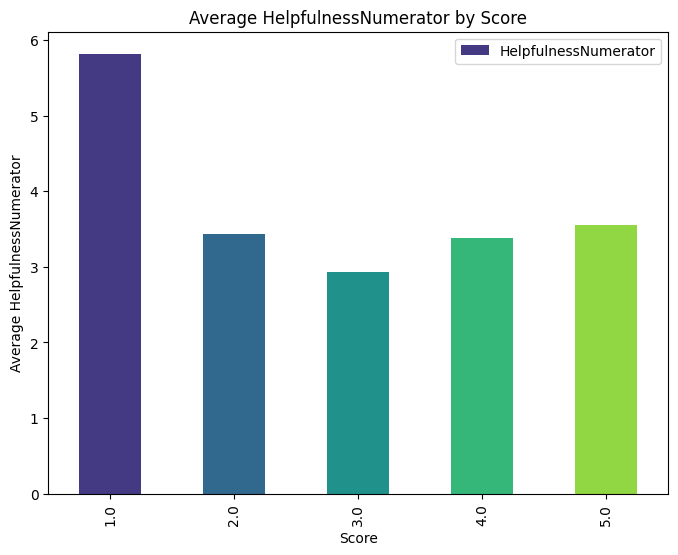

Correlation between HelpfulnessNumerator and Score
                      HelpfulnessNumerator     Score
HelpfulnessNumerator              1.000000 -0.015887
Score                            -0.015887  1.000000
Average HelpfulnessDenominator by Score:
Score
1.0    15.580722
2.0     7.648543
3.0     4.901262
4.0     4.306171
5.0     4.367424
Name: HelpfulnessDenominator, dtype: float64


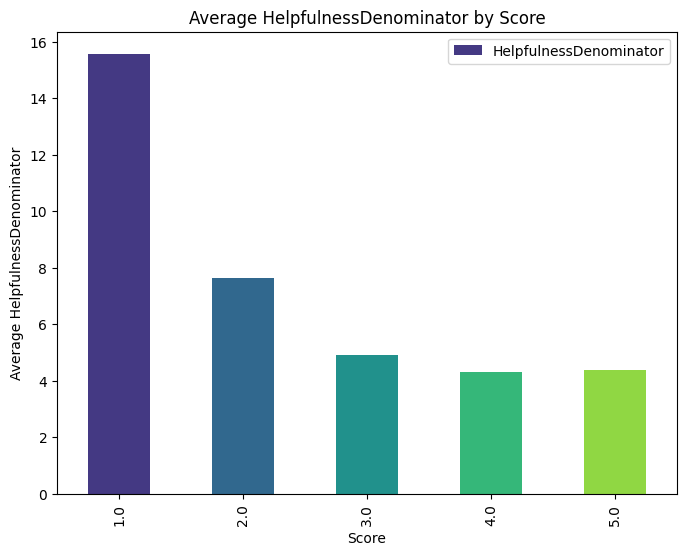

Correlation between HelpfulnessDenominator and Score
                        HelpfulnessDenominator    Score
HelpfulnessDenominator                 1.00000 -0.10764
Score                                 -0.10764  1.00000
Average Helpfulness by Score:
Score
1.0    0.362576
2.0    0.365012
3.0    0.370858
4.0    0.432851
5.0    0.400386
Name: Helpfulness, dtype: float64


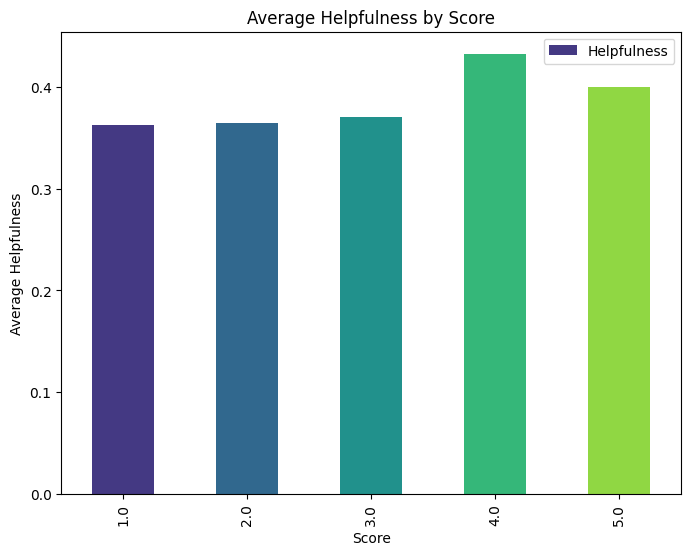

Correlation between Helpfulness and Score
             Helpfulness     Score
Helpfulness     1.000000  0.029479
Score           0.029479  1.000000
Average ReviewLengthWords by Score:
Score
1.0    153.054260
2.0    196.890341
3.0    196.586142
4.0    192.119343
5.0    137.888379
Name: ReviewLengthWords, dtype: float64


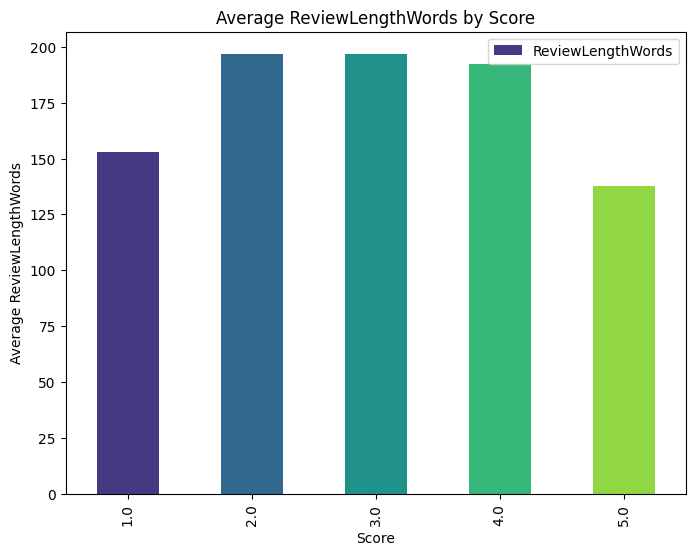

Correlation between ReviewLengthWords and Score
                   ReviewLengthWords     Score
ReviewLengthWords           1.000000 -0.079194
Score                      -0.079194  1.000000
Average Sentiment by Score:
Score
1.0   -0.011499
2.0    0.066287
3.0    0.148364
4.0    0.213358
5.0    0.288974
Name: Sentiment, dtype: float64


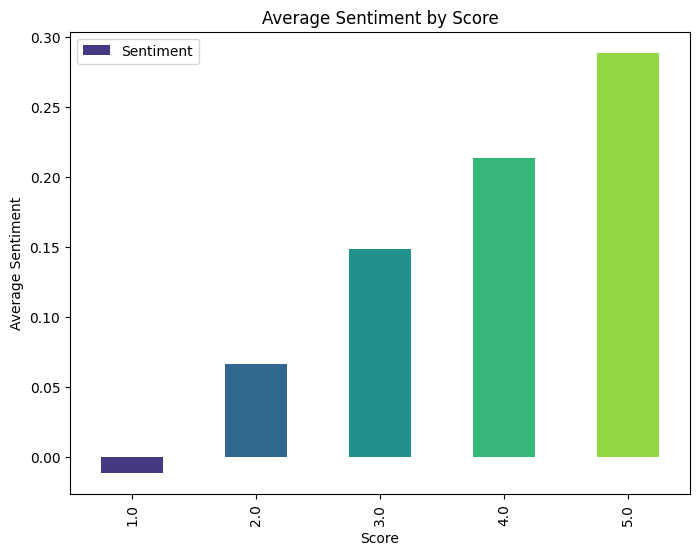

Correlation between Sentiment and Score
           Sentiment     Score
Sentiment   1.000000  0.422047
Score       0.422047  1.000000


In [4]:
def AnalyzeFeature(df, feature):
    # group data by 'Score' and calculate the average of the feature for each score
    avg_feat_by_score = df.groupby('Score')[feature].mean()

    print(f"Average {feature} by Score:")
    print(avg_feat_by_score)
    colors = sns.color_palette("viridis", len(avg_feat_by_score))
    # Plot the average of the specified feature by score
    plt.figure(figsize=(8, 6))
    avg_feat_by_score.plot(kind='bar', color=colors, legend = True)
    plt.title(f'Average {feature} by Score')
    plt.xlabel('Score')
    plt.ylabel(f'Average {feature}')
    plt.show()

    # get correlation between feature and 'Score'
    correlation = df[[feature, 'Score']].corr()

    print("Correlation between", feature, "and Score")
    print(correlation)

print(X_train.columns)
print("analyzing features")
numericFeatures = ["HelpfulnessNumerator", "HelpfulnessDenominator", "Helpfulness", "ReviewLengthWords", "Sentiment"]
for nf in numericFeatures:
  AnalyzeFeature(X_train, nf)

# Sample + Split into training and testing set

In [5]:
print("Sample and split into training and testing set")
print(X_train.columns)
# filter out num-numeric columns
numericFeatures = ["HelpfulnessNumerator", "HelpfulnessDenominator", "Helpfulness", "ReviewLengthWords", "Sentiment", "Score"]

X_train = X_train[numericFeatures]
#handle NaNs
X_train = X_train.fillna(0)  

# split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

# print initial distribution of Y_train
print("initial class distribution:")
print(Y_train.value_counts())

# apply SMOTE for oversampling of the minority classes
smote = SMOTE(random_state=0)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# print new distribution of Y_train after balancing
print("balanced distribution of y_train")
print(Y_train_balanced.value_counts())

# reduce the size of X_train and Y_train (for faster testing)
print("reducing size of X_train and Y_train")
# use half of the balanced training set
X_train_balanced = X_train_balanced.sample(frac=0.5, random_state=0)  
# make sure that the labels match the reduced training set
Y_train_balanced = Y_train_balanced.loc[X_train_balanced.index]  
# use half of the balanced training set 
X_train = X_train.sample(frac=0.5, random_state=0)  
# make sure that the labels match the reduced training set
Y_train = Y_train.loc[X_train.index]  
print("completed reducing size of X_train and Y_train")

# hyperparameter tuning for KNN
#print("begin hyperparameter tuning for KNN")
# testing odd values from 1 to 29
#param_grid = {'n_neighbors': range(1, 30, 2)} 
#knn = KNeighborsClassifier()
#grid_search = GridSearchCV(knn, param_grid, cv=5)
#grid_search.fit(X_train_balanced, Y_train_balanced)
#best_n_neighbors = grid_search.best_params_['n_neighbors']
#print("Hyperparameter tuning for KNN complete")
#print(best_n_neighbors, "is best_n_neighbors")

# print the size of the reduced dataset and a sample of reduced X train 
print(f"reduced X_train size: {X_train_balanced.shape}")
print("sample of reduced X_train:")
print(X_train_balanced.head())

Sample and split into training and testing set
Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'ReviewLengthWords', 'Sentiment'],
      dtype='object')
initial class distribution:
Score
5.0    595120
4.0    251418
3.0    131911
1.0     68284
2.0     67272
Name: count, dtype: int64
balanced distribution of y_train
Score
5.0    595120
2.0    595120
1.0    595120
4.0    595120
3.0    595120
Name: count, dtype: int64
reducing size of X_train and Y_train
completed reducing size of X_train and Y_train
reduced X_train size: (1487800, 5)
sample of reduced X_train:
         HelpfulnessNumerator  HelpfulnessDenominator  Helpfulness  \
732558                      4                       5     0.800000   
1950472                     1                       2     0.500000   
2145440                     0                       1     0.000000   
281797                      0                       0 

# Feature Selection

In [6]:
print("feature selection")
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'Sentiment', 'ReviewLengthWords']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

X_train_select = X_train_balanced[features]
Y_train_select = Y_train_balanced

feature selection


# Model Creation

In [7]:
print ("model creation")
# learn the model
# use n_neighbors = 175
model = KNeighborsClassifier(n_neighbors=175).fit(X_train_select, Y_train_select)

# predict the score using the model
Y_test_predictions = model.predict(X_test_select)

model creation


# Model Evaluation

model evaluation
Accuracy on testing set =  0.3946991404011461


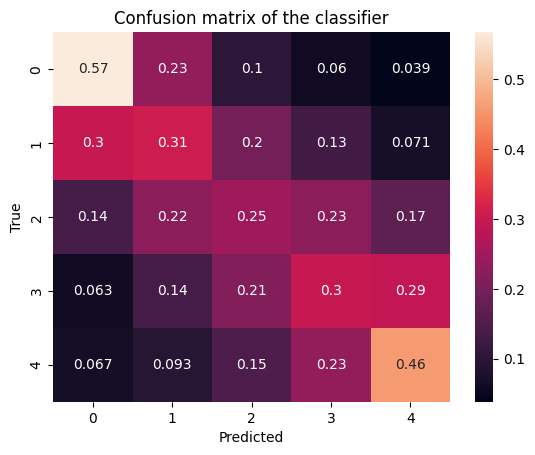

In [8]:
print("model evaluation")
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [9]:
print("create submission file")
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
submission.to_csv("/kaggle/working/submission.csv", index=False)

create submission file
